In [1]:
import xml.etree.ElementTree as ET 
import csv
from collections import defaultdict
from operator import itemgetter
from matplotlib import pyplot as plt

In [65]:
def parseXML(xmlfile):
    tree = ET.parse(xmlfile) 
    root = tree.getroot() 
    
    filename = xmlfile.split('/')[-1].split('.')[0]
    
#     print(filename)
    
    prev_name = ''
    
    for obj in root.findall('object'): 
        for name in obj.findall('name'):
            return [filename, name.text]

In [66]:
from os import listdir
from os.path import isfile, join

xml_dir = '/home/jayanta/Downloads/VOCtrainval_11-May-2012/VOCdevkit/VOC2012/Annotations/'

files = [join(xml_dir, f) for f in listdir(xml_dir) if isfile(join(xml_dir, f))]

classes = {}

for file in files:
    cls = parseXML(file)
    classes[cls[0]] = cls[1]

In [67]:
classes

{'2012_002017': 'person',
 '2010_002842': 'pottedplant',
 '2011_006003': 'person',
 '2012_002697': 'person',
 '2011_000385': 'dog',
 '2012_002485': 'person',
 '2011_004331': 'person',
 '2008_008055': 'train',
 '2010_001478': 'car',
 '2010_006786': 'person',
 '2012_003601': 'person',
 '2008_002411': 'horse',
 '2012_004210': 'person',
 '2009_000249': 'cat',
 '2011_006610': 'person',
 '2012_001404': 'person',
 '2009_002517': 'bus',
 '2011_002887': 'chair',
 '2010_004188': 'sheep',
 '2010_002138': 'cat',
 '2010_000120': 'person',
 '2008_002080': 'person',
 '2011_003124': 'train',
 '2010_001426': 'aeroplane',
 '2008_003492': 'person',
 '2009_002185': 'person',
 '2010_004499': 'sheep',
 '2008_003722': 'bottle',
 '2008_003338': 'person',
 '2009_002222': 'person',
 '2011_007157': 'person',
 '2008_001260': 'boat',
 '2007_006549': 'boat',
 '2009_003214': 'tvmonitor',
 '2011_003163': 'bird',
 '2012_002816': 'person',
 '2009_001917': 'car',
 '2010_004017': 'dog',
 '2011_000629': 'aeroplane',
 '200

In [75]:
iou_per_class = defaultdict(float)
num_per_class = defaultdict(float)

with open('data/voc_val_iou.csv') as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        if 0 <= float(row[-1]) <= 1:
            iou_per_class[classes[row[0]]] += float(row[-1])
            num_per_class[classes[row[0]]] += 1
            
for cls in iou_per_class:
    iou_per_class[cls] /= num_per_class[cls]

In [76]:
iou_per_class

defaultdict(float,
            {'aeroplane': 0.5293221785399009,
             'train': 0.5918528321477632,
             'boat': 0.4910237937397442,
             'bicycle': 0.7068573701015108,
             'sheep': 0.6406505369490177,
             'tvmonitor': 0.5963091449420306,
             'person': 0.7204179104534093,
             'horse': 0.5761610920919081,
             'bottle': 0.5912981503168503,
             'sofa': 0.35954243114582746,
             'cow': 0.5128289705467519,
             'bus': 0.762102943020972,
             'diningtable': 0.6736608444600486,
             'chair': 0.532012464227867,
             'dog': 0.5461631915694622,
             'bird': 0.5150455366611132,
             'car': 0.6866235455891082,
             'cat': 0.5158318883177141,
             'motorbike': 0.7708731655332621,
             'pottedplant': 0.5171516336062129})

In [78]:
sorted(iou_per_class.items(), key=itemgetter(1))

[('sofa', 0.35954243114582746),
 ('boat', 0.4910237937397442),
 ('cow', 0.5128289705467519),
 ('bird', 0.5150455366611132),
 ('cat', 0.5158318883177141),
 ('pottedplant', 0.5171516336062129),
 ('aeroplane', 0.5293221785399009),
 ('chair', 0.532012464227867),
 ('dog', 0.5461631915694622),
 ('horse', 0.5761610920919081),
 ('bottle', 0.5912981503168503),
 ('train', 0.5918528321477632),
 ('tvmonitor', 0.5963091449420306),
 ('sheep', 0.6406505369490177),
 ('diningtable', 0.6736608444600486),
 ('car', 0.6866235455891082),
 ('bicycle', 0.7068573701015108),
 ('person', 0.7204179104534093),
 ('bus', 0.762102943020972),
 ('motorbike', 0.7708731655332621)]

In [79]:
iou_per_image = defaultdict(float)

with open('data/voc_val_iou.csv') as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        iou_per_image[row[0]] = float(row[-1])

In [80]:
sorted_by_image = sorted(iou_per_image.items(), key=itemgetter(1))

print(sorted_by_image[:10])
print(sorted_by_image[-10:])

[('2009_003241', 5.339284335615629e-14), ('2010_000764', 5.469302650194843e-14), ('2009_003607', 7.424227402766142e-14), ('2008_003105', 7.725668402973813e-14), ('2008_005544', 1.012275833578128e-13), ('2011_001713', 1.1258190458323777e-13), ('2010_000836', 1.6296425036519693e-13), ('2009_001684', 2.0244668930671154e-13), ('2008_004172', 2.4607723592554094e-13), ('2007_004644', 2.560482409686927e-13)]
[('2009_003806', 0.9954227816878201), ('2007_000175', 0.995518887760381), ('2009_002035', 0.9955551840854364), ('2007_007084', 0.9959544119320914), ('2008_002778', 0.996034774321348), ('2008_003546', 0.9963710721217744), ('2007_004856', 0.9971201698477683), ('2010_004042', 0.9972144162052553), ('2007_003188', 0.9973554384677272), ('2011_000436', 0.9984731242140875)]


dog 5.339284335615629e-14
train 5.469302650194843e-14
sofa 7.424227402766142e-14
train 7.725668402973813e-14
train 1.012275833578128e-13
pottedplant 1.1258190458323777e-13
bird 1.6296425036519693e-13
pottedplant 2.0244668930671154e-13
sofa 2.4607723592554094e-13
dog 2.560482409686927e-13


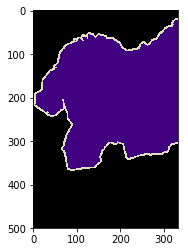

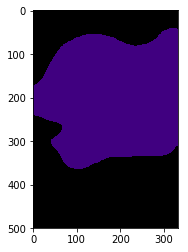

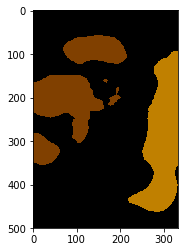

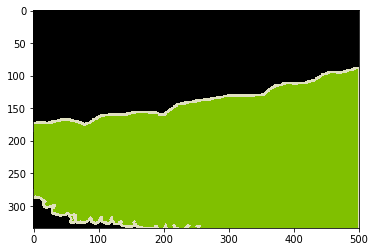

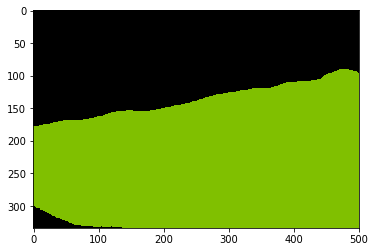

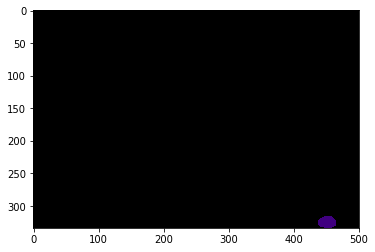

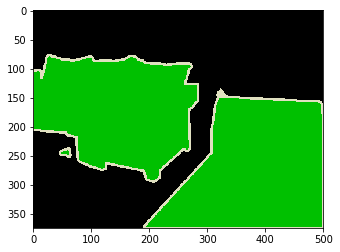

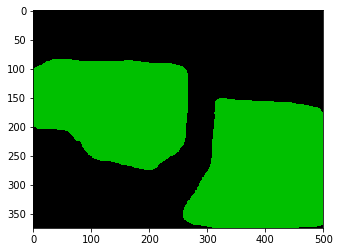

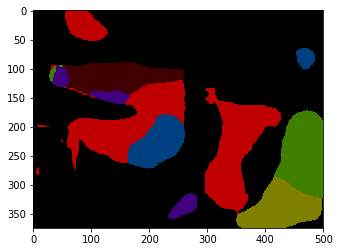

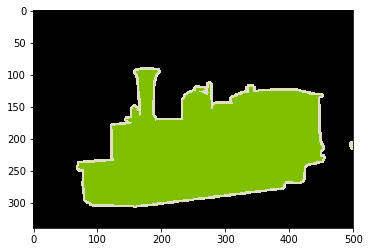

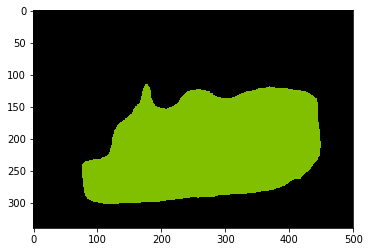

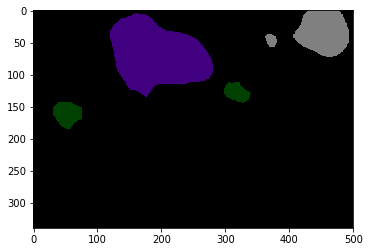

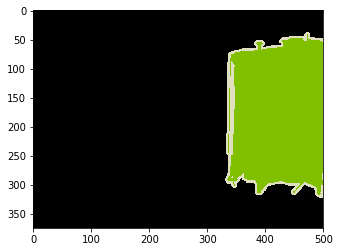

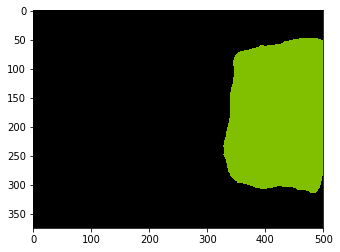

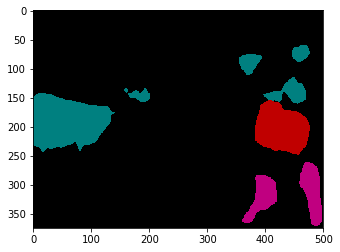

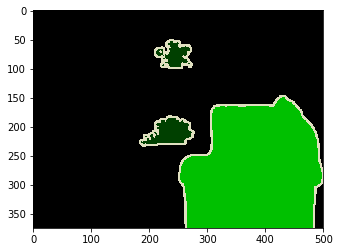

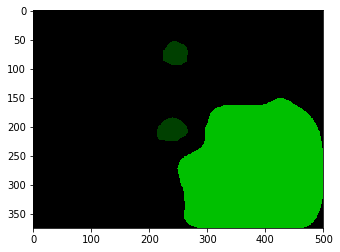

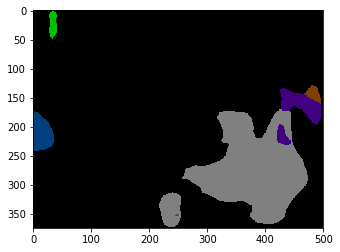

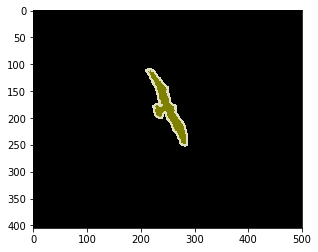

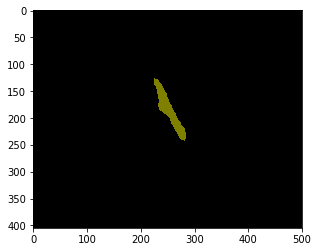

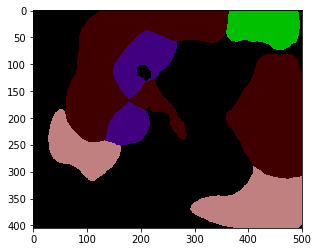

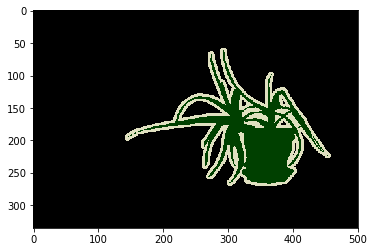

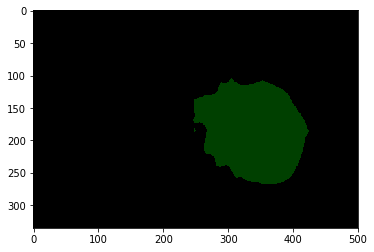

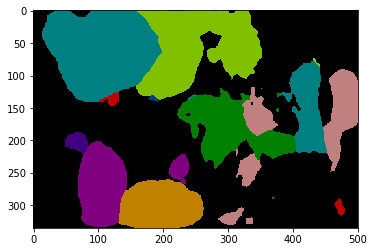

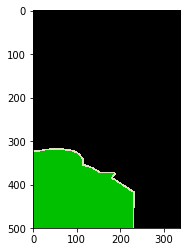

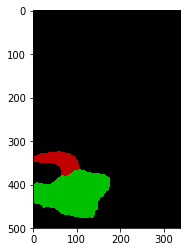

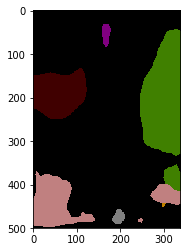

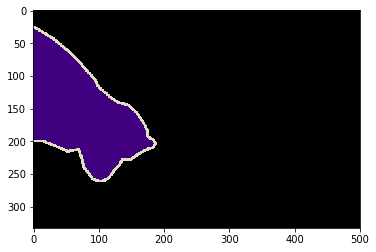

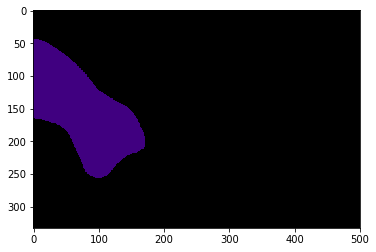

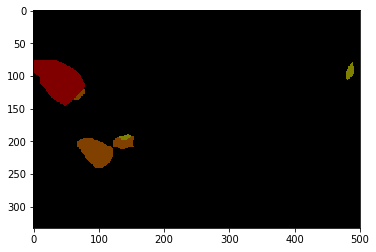

In [87]:
gt_path = '/home/jayanta/Downloads/VOCtrainval_11-May-2012/VOCdevkit/VOC2012/SegmentationClass/'
pred_path = '/home/jayanta/Downloads/sp_op/content/adversarial-attacks/output/voc_val/'

for fname, iou in sorted_by_image[:10]:
    print(classes[fname], iou)
    plt.figure()
    plt.imshow(plt.imread(join(gt_path, fname + '.png')))
    plt.figure()
    plt.imshow(plt.imread(join(pred_path, fname + '_original_pred_fcn8.png')))
    plt.figure()
    plt.imshow(plt.imread(join(pred_path, fname + '_adversarial_pred_fcn8_eps=2.0_target_idx=0.png')))

aeroplane 0.9954227816878201
sheep 0.995518887760381
cow 0.9955551840854364
bird 0.9959544119320914
cow 0.996034774321348
person 0.9963710721217744
cat 0.9971201698477683
motorbike 0.9972144162052553
bicycle 0.9973554384677272
sheep 0.9984731242140875


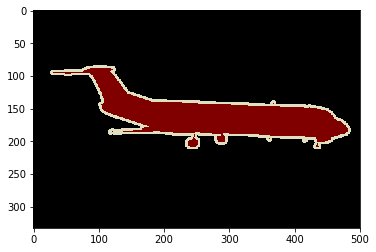

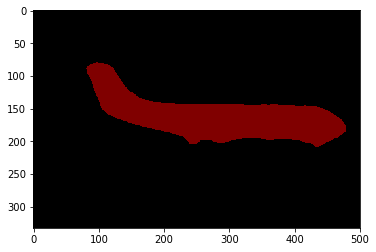

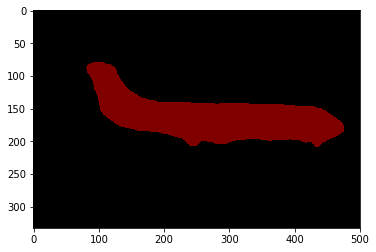

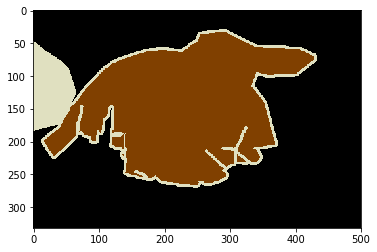

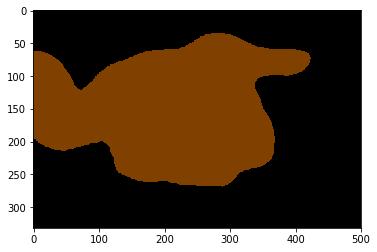

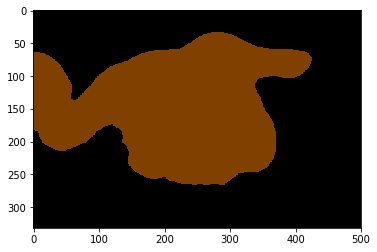

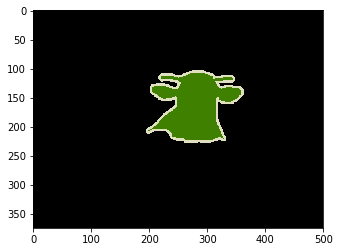

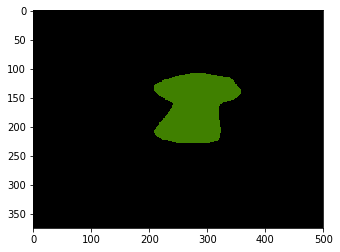

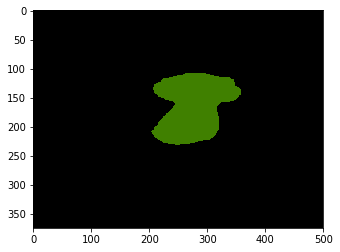

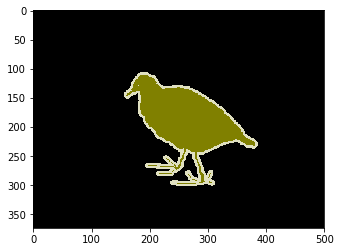

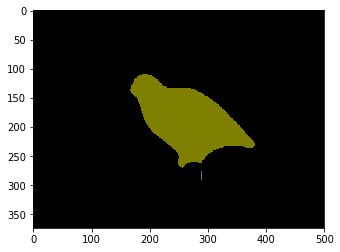

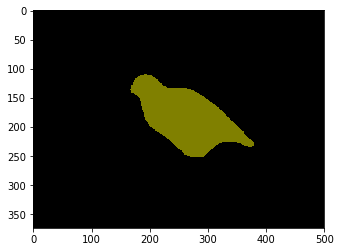

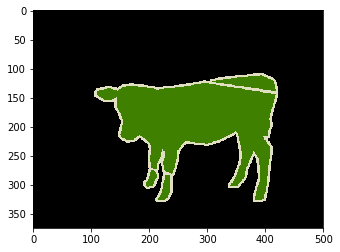

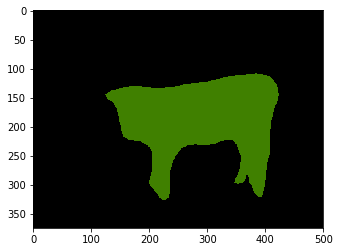

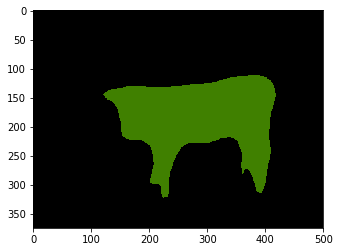

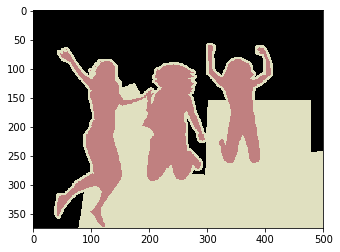

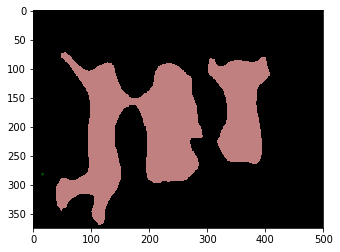

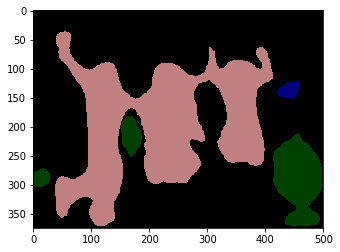

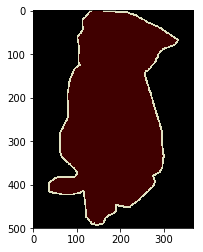

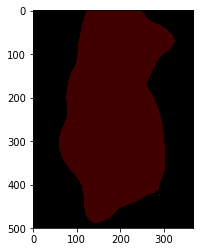

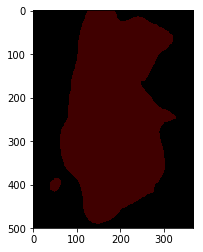

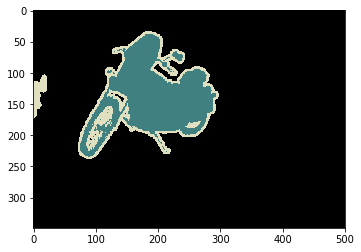

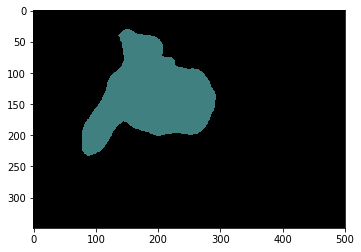

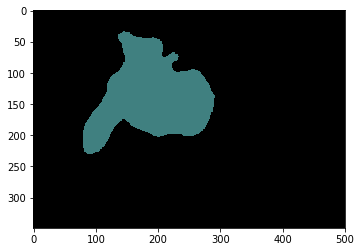

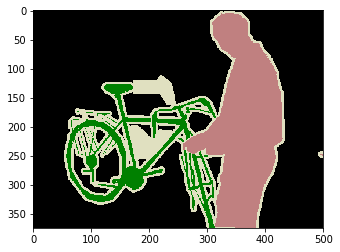

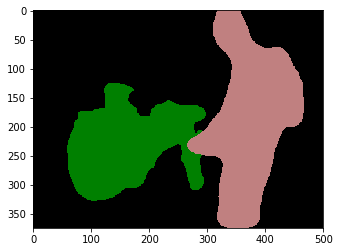

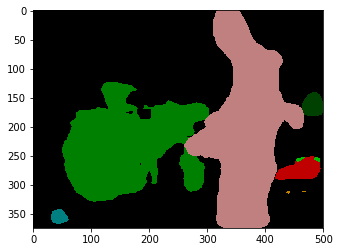

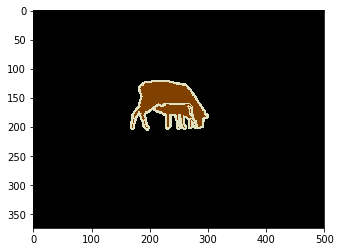

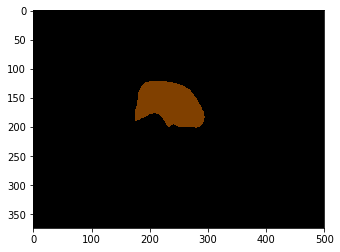

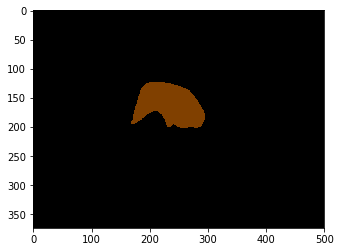

In [88]:
for fname, iou in sorted_by_image[-10:]:
    print(classes[fname], iou)
    plt.figure()
    plt.imshow(plt.imread(join(gt_path, fname + '.png')))
    plt.figure()
    plt.imshow(plt.imread(join(pred_path, fname + '_original_pred_fcn8.png')))
    plt.figure()
    plt.imshow(plt.imread(join(pred_path, fname + '_adversarial_pred_fcn8_eps=2.0_target_idx=0.png')))

In [2]:
x = plt.imread('data/2007_000033.png')

In [4]:
x.shape

(366, 500, 3)